In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [14]:
#LOADING THE DATA SET
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [15]:
print(df.shape)

(1436, 11)


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [19]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [20]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


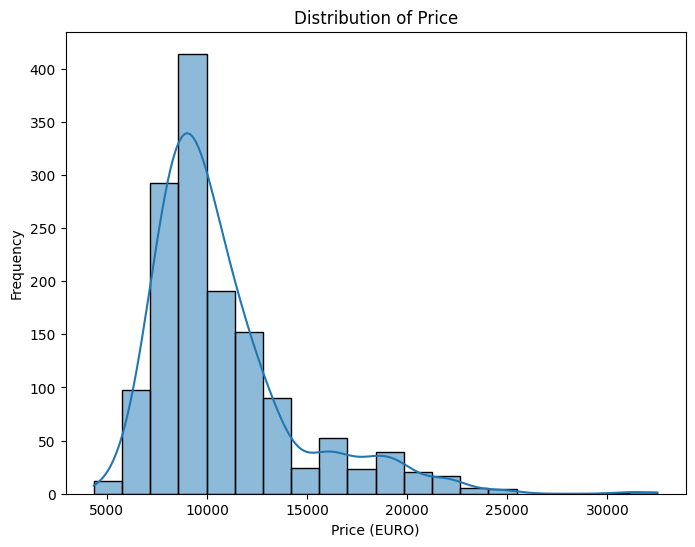

In [21]:
# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=20)
plt.title('Distribution of Price')
plt.xlabel('Price (EURO)')
plt.ylabel('Frequency')
plt.show()

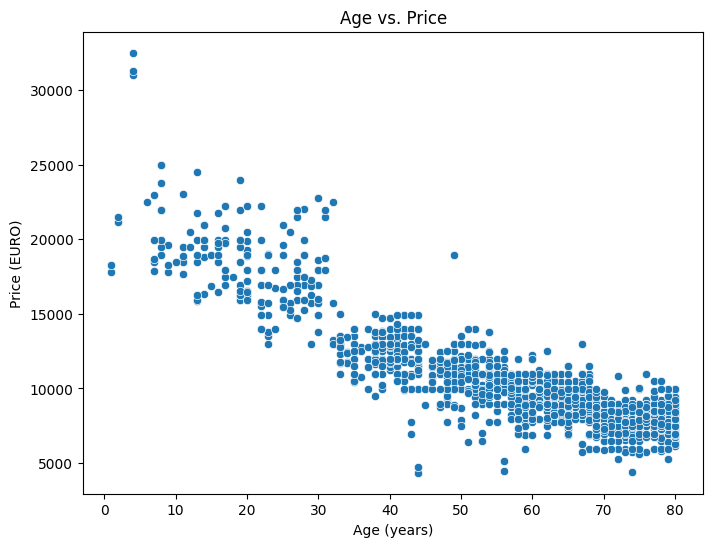

In [22]:
# Visualize the relationship between Age and Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age_08_04', y='Price', data=df)
plt.title('Age vs. Price')
plt.xlabel('Age (years)')
plt.ylabel('Price (EURO)')
plt.show()

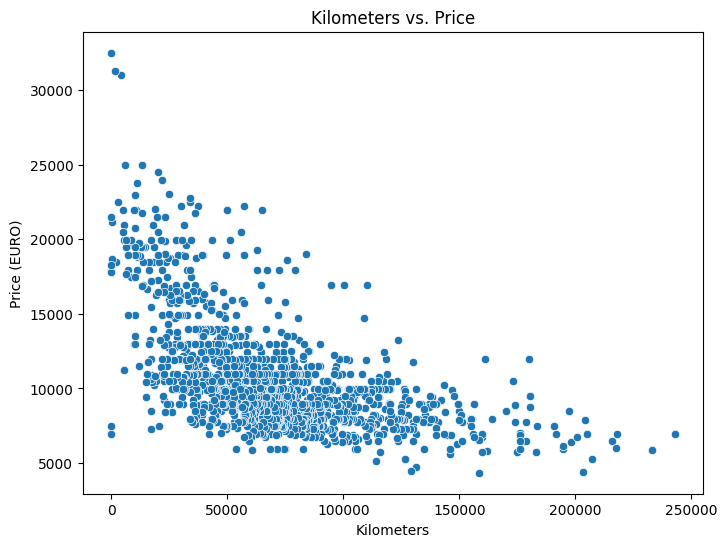

In [23]:
# Visualize the relationship between Kilometers and Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='KM', y='Price', data=df)
plt.title('Kilometers vs. Price')
plt.xlabel('Kilometers')
plt.ylabel('Price (EURO)')
plt.show()

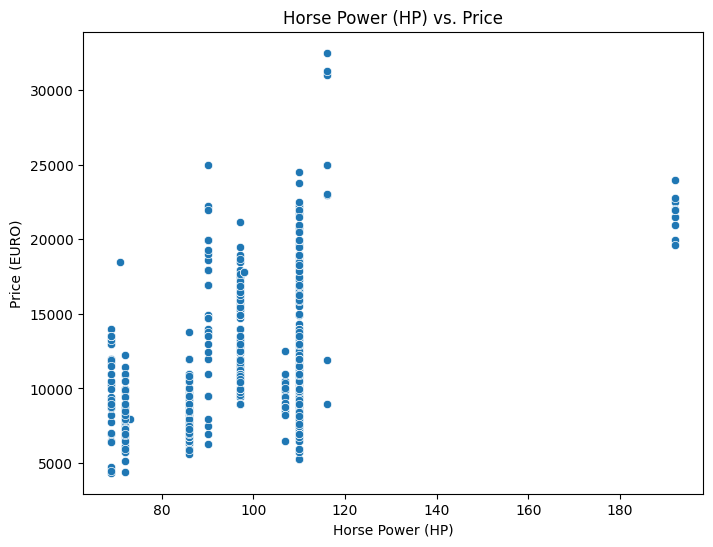

In [25]:
# Visualize the relationship between Horse Power (HP) and Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HP', y='Price', data=df)
plt.title('Horse Power (HP) vs. Price')
plt.xlabel('Horse Power (HP)')
plt.ylabel('Price (EURO)')
plt.show()

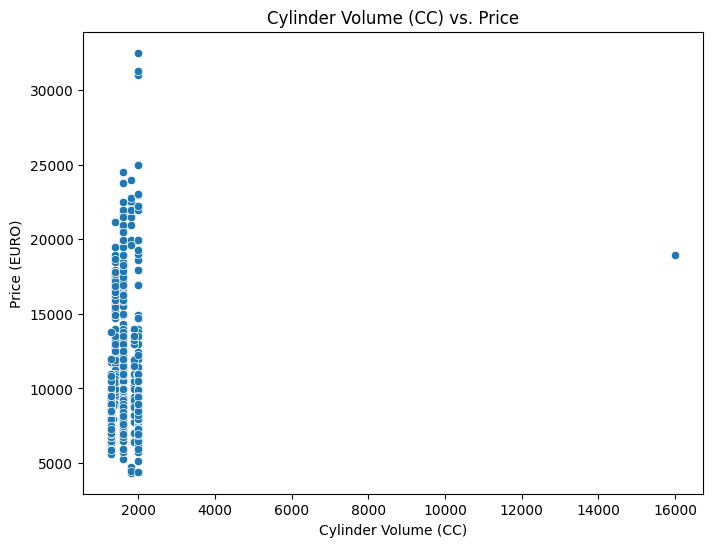

In [26]:
# Visualize the relationship between Cylinder Volume (CC) and Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cc', y='Price', data=df)
plt.title('Cylinder Volume (CC) vs. Price')
plt.xlabel('Cylinder Volume (CC)')
plt.ylabel('Price (EURO)')
plt.show()

Preprocess the data for MLR
Convert categorical variables to dummy variables

In [27]:
# Check the column names in the dataset
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [29]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Automatic'])

In [30]:
# Drop any remaining missing values if applicable
df.dropna(inplace=True)

In [31]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [32]:
# Display the preprocessed dataset
print("Preprocessed dataset:")
print(df.head())

Preprocessed dataset:
   Price  Age_08_04     KM  HP    cc  Doors  Cylinders  Gears  Weight  \
0  13500         23  46986  90  2000      3          4      5    1165   
1  13750         23  72937  90  2000      3          4      5    1165   
2  13950         24  41711  90  2000      3          4      5    1165   
3  14950         26  48000  90  2000      3          4      5    1165   
4  13750         30  38500  90  2000      3          4      5    1170   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  Automatic_0  Automatic_1  
0          False              True             False         True        False  
1          False              True             False         True        False  
2          False              True             False         True        False  
3          False              True             False         True        False  
4          False              True             False         True        False  


User
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).



In [33]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (1148, 13) (1148,)
Testing set shape (X, y): (288, 13) (288,)


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [34]:
# Basic model using all features
model_basic = LinearRegression()
model_basic.fit(X_train, y_train)

LinearRegression()

In [44]:
# Define the evaluate_model function
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [42]:
# Model with selected features based on correlation analysis
selected_features =['Age_08_04', 'KM', 'HP',  'Doors', 'Weight',  'Automatic_0', 'Automatic_1']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)


LinearRegression()

In [45]:
# Evaluate the model with selected features
mse_selected, r2_selected = evaluate_model(model_selected, X_test_selected, y_test)

print("Selected Features Model:")
print("Mean Squared Error:", mse_selected)
print("R-squared:", r2_selected)

Selected Features Model:
Mean Squared Error: 1983476.4818010922
R-squared: 0.8513446847555144


4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [46]:
# Make predictions on the testing dataset
y_pred = model_selected.predict(X_test_selected)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Performance Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Performance Metrics:
Mean Squared Error: 1983476.4818010922
R-squared: 0.8513446847555144


5.Apply Lasso and Ridge methods on the model.

In [47]:
from sklearn.linear_model import Lasso, Ridge

# Apply Lasso method
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train_selected, y_train)

# Apply Ridge method
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha parameter
ridge_model.fit(X_train_selected, y_train)

# Evaluate Lasso model
y_pred_lasso = lasso_model.predict(X_test_selected)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate Ridge model
y_pred_ridge = ridge_model.predict(X_test_selected)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics for Lasso model
print("Lasso Model:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)
print()

# Print evaluation metrics for Ridge model
print("Ridge Model:")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)

Lasso Model:
Mean Squared Error: 1983511.3834925592
R-squared: 0.8513420689836637

Ridge Model:
Mean Squared Error: 1983479.5121126133
R-squared: 0.8513444576432101


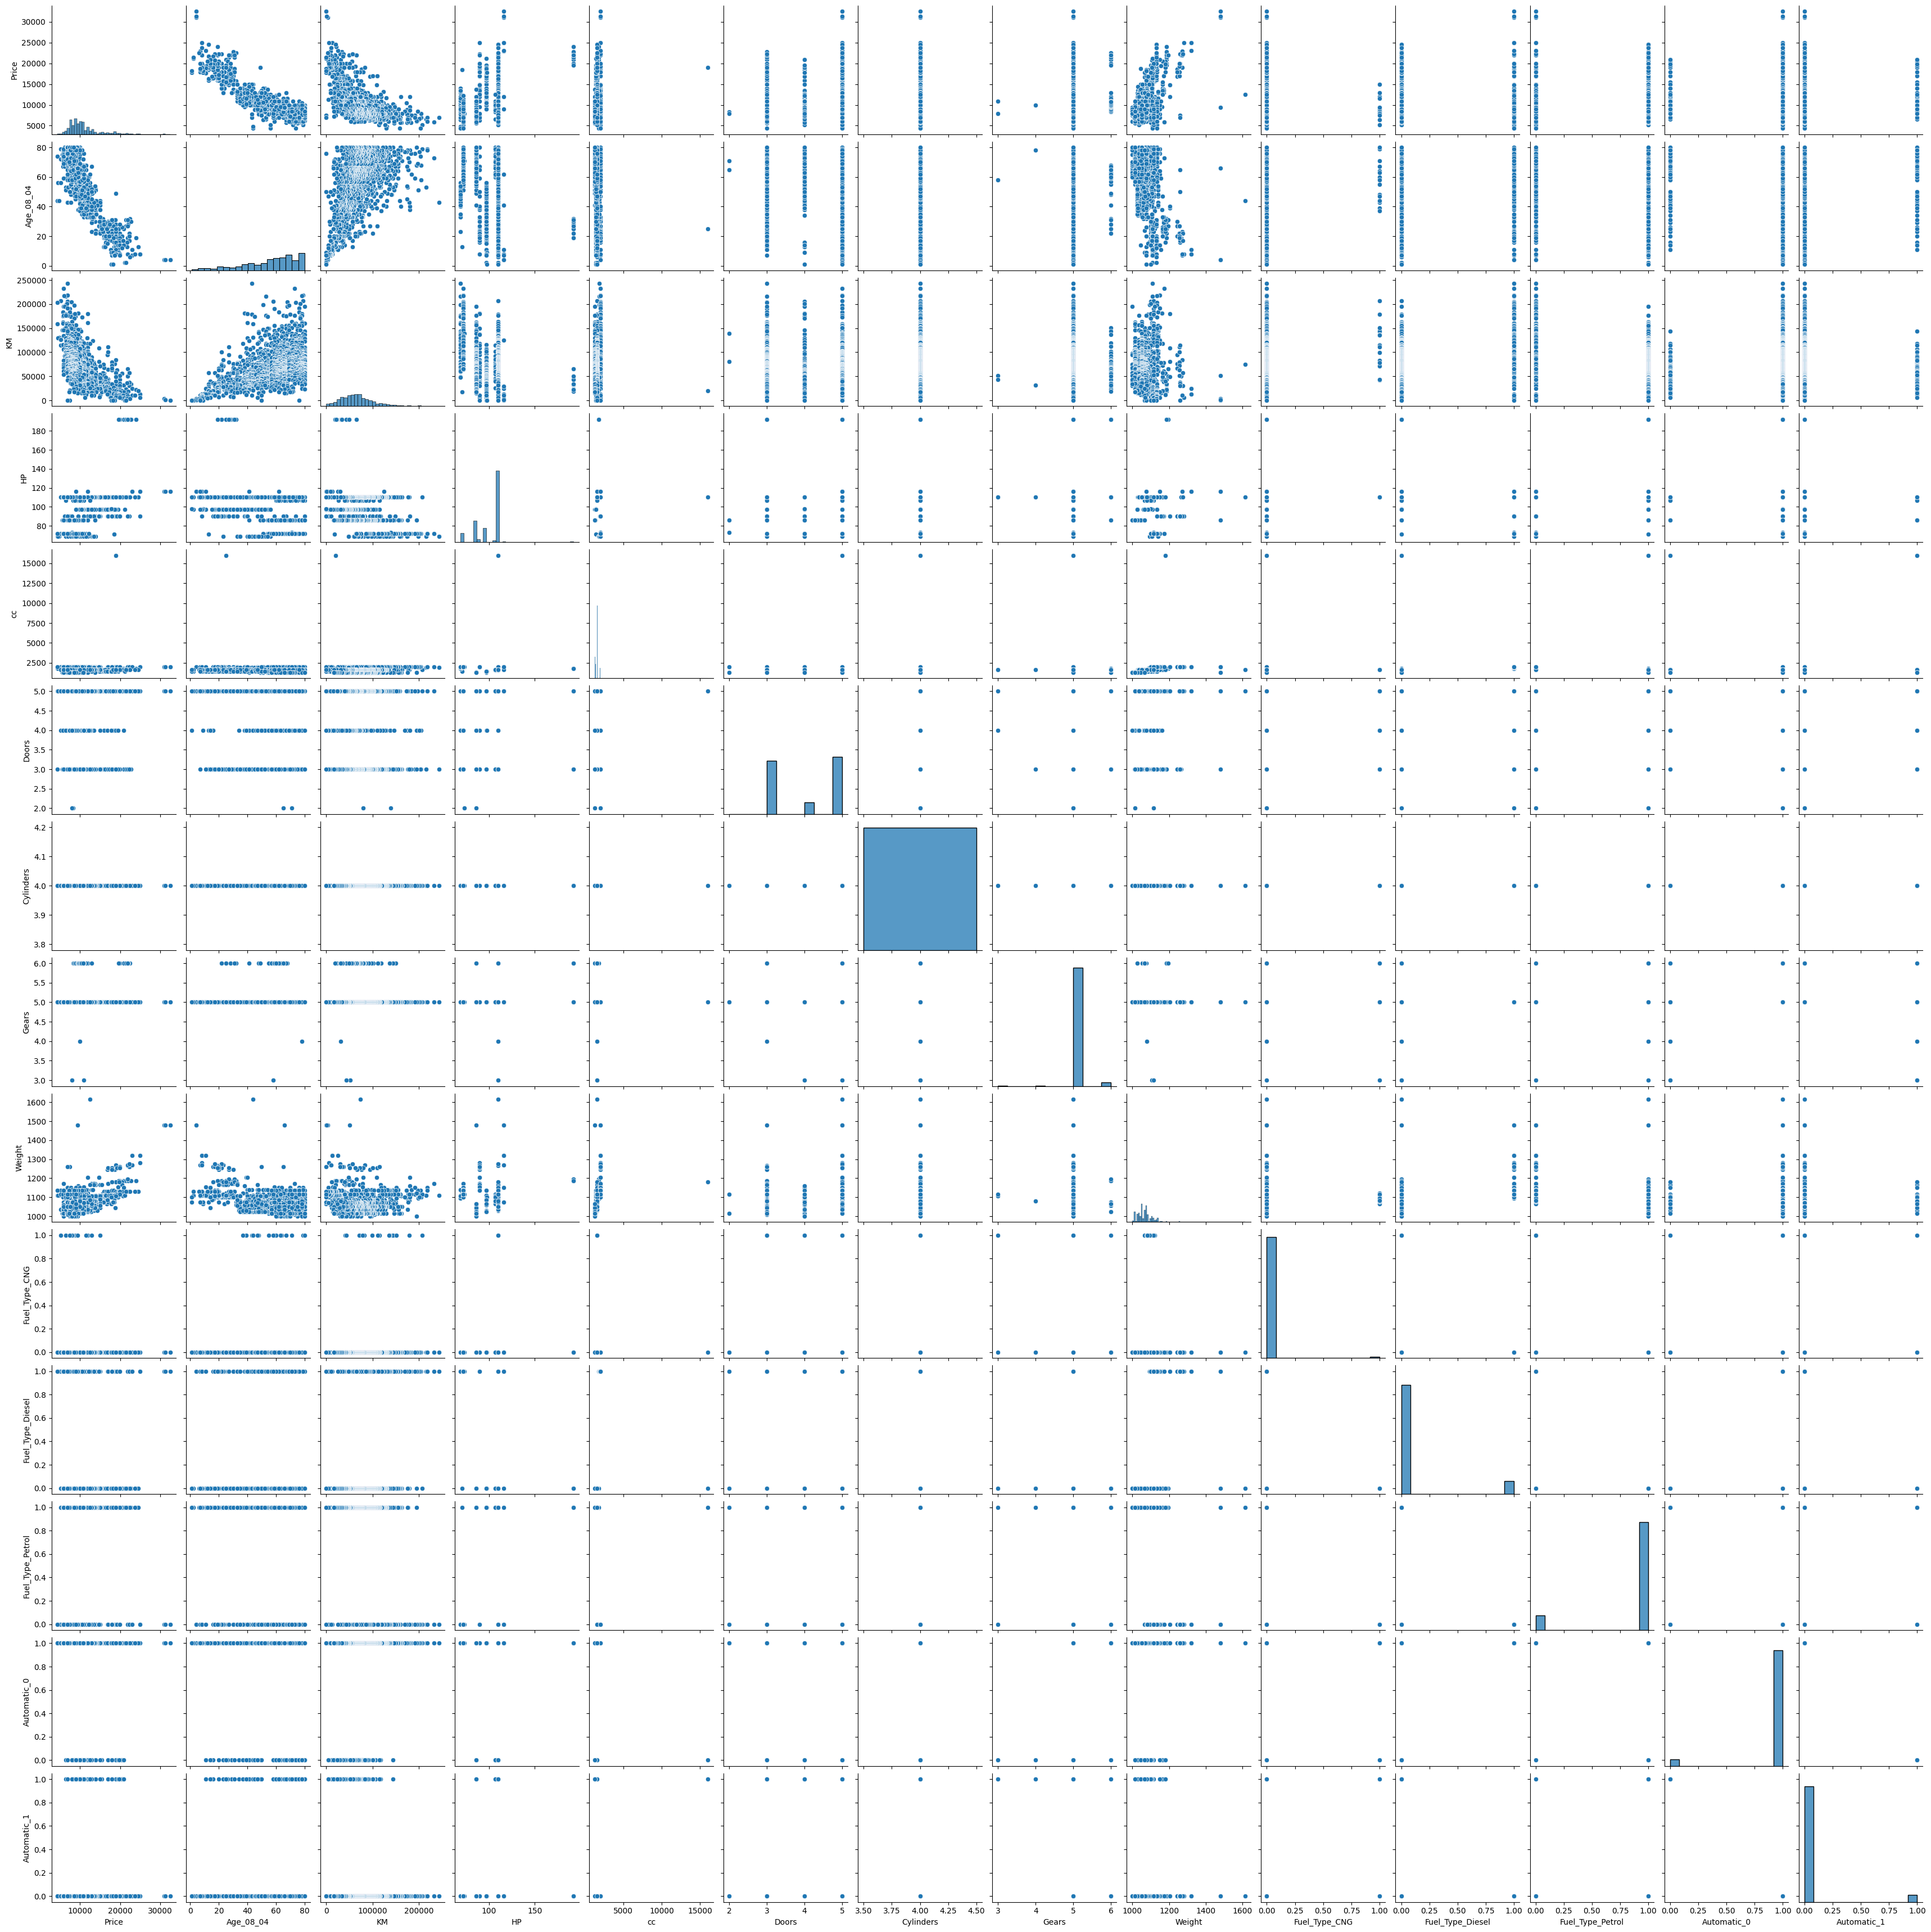

In [48]:
sns.pairplot(df)
plt.show()